# Introduction to Data Visualization with Seaborn

# Software We Will Use

We will use Python and popular visualization libraries such as:
  * `seaborn`, `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.  
  * `numpy`, `pandas`. Linear algebra and data processing libraries used to implement algorithms from scratch.

# Executable Course Materials

The core materials for this course (including the slides!) are created using Jupyter notebooks.
* We are going to embed an execute code directly in the slides and use that to demonstrate algorithms.
* These slides can be downloaded locally and all the code can be reproduced.

In [54]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

In [55]:
# Wonhee's special methods to display large DataFrames
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

#  State Crime in the United States

Let’s start with a simple example of EDA and visualization problem: state crime in the US.

Suppose we have a dataset of state crime in the United States. 
- From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. 

# State Crime Dataset

- The following dataset [state crime](https://corgis-edu.github.io/corgis/csv/state_crime/) obtained from `CORGIS Dataset Project` has information on the crime rates and totals for states across the United States for a wide range of years. 

- The crime reports are divided into two main categories: property and violent crime. 

- Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. 

- These reports go from 1960 to 2019.

In [56]:
# importing csv file using pandas
state_crime = pd.read_csv('state_crime.csv')

In [57]:
state_crime.shape

(3115, 21)

In [58]:
# let's check a range of years
state_crime.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [59]:
# nulls exist?
state_crime.isnull().sum()

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

In [60]:
# unique in each column
state_crime.nunique()

State                              52
Year                               60
Data.Population                  2883
Data.Rates.Property.All          3011
Data.Rates.Property.Burglary     2775
Data.Rates.Property.Larceny      2953
Data.Rates.Property.Motor        2458
Data.Rates.Violent.All           2562
Data.Rates.Violent.Assault       2314
Data.Rates.Violent.Murder         220
Data.Rates.Violent.Rape           671
Data.Rates.Violent.Robbery       1801
Data.Totals.Property.All         3096
Data.Totals.Property.Burglary    3044
Data.Totals.Property.Larceny     3088
Data.Totals.Property.Motor       2932
Data.Totals.Violent.All          2971
Data.Totals.Violent.Assault      2868
Data.Totals.Violent.Murder        999
Data.Totals.Violent.Rape         1936
Data.Totals.Violent.Robbery      2569
dtype: int64

In [61]:
state_crime.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [62]:
df_interact(state_crime)

interactive(children=(IntSlider(value=0, description='row', max=3115, step=7), IntSlider(value=0, description=…

(3115 rows, 21 columns) total


In [63]:
state_crime.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

# Trend Relationship

### regplot

`regplot` and `lmplot` are very similar in terms of functionalities and usage. But there are a few differences that we need to know. Both would fit a linear regression on given data and will give a trend line.   
* `regplot()` accepts data in variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data.   
* `lmplot()` has data as a required parameter and the x and y variables must be specified as strings, but it has more features

Count chart for `total property crimes` with `year` in the whole USA.


In [64]:
state_crime.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [65]:
# let's filter some data
state_crime_usa = state_crime[state_crime.State == 'United States']
state_crime_states = state_crime[state_crime.State != 'United States']

<Axes: xlabel='Year', ylabel='Data.Totals.Violent.All'>

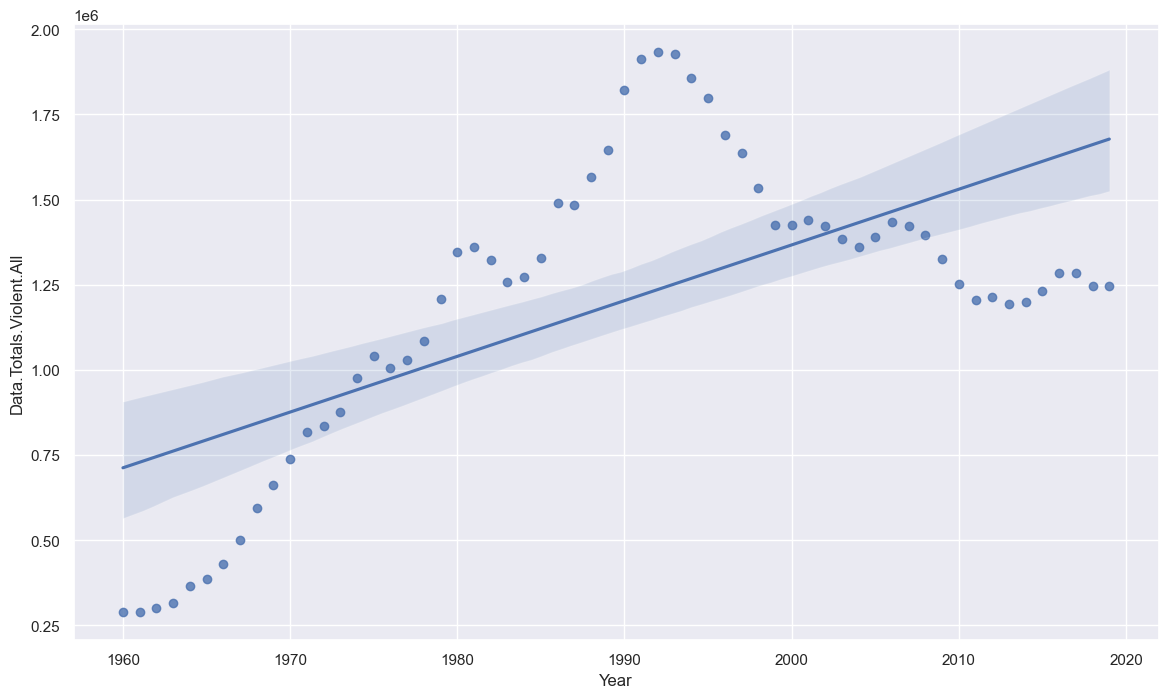

In [66]:
sns.set_style('darkgrid')  # changes the background of the plot
plt.figure(figsize=(14, 8))
# fit_reg fits a regression line
sns.regplot(x='Year', y='Data.Totals.Violent.All', data=state_crime_usa, fit_reg=True)

<Axes: xlabel='Year', ylabel='Data.Totals.Property.All'>

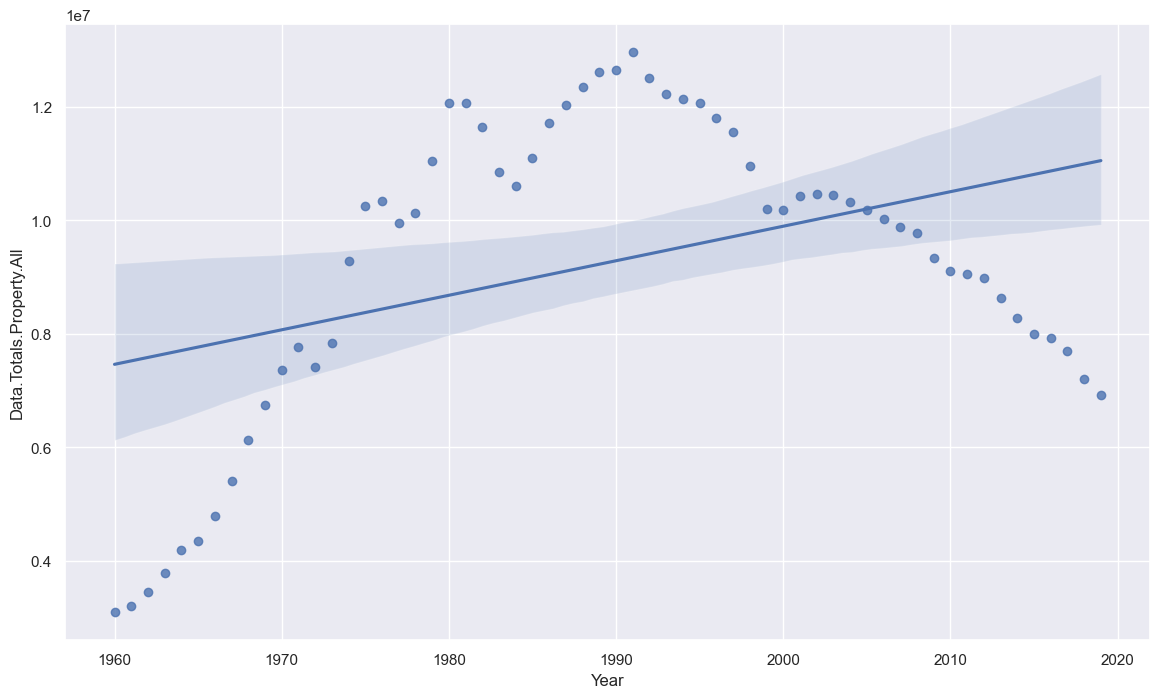

In [67]:
plt.figure(figsize=(14, 8))
sns.regplot(x="Year", y="Data.Totals.Property.All", data=state_crime_usa,
    fit_reg=True)  # fit_reg fits a regression line

**The scatter plots show that the overall crime in USA increased till 1992, after which they started decreasing.**

In the first plot, we see  that a non-linear trend line would be better than a linear trend. We can use `order=2` to make a non-linear trend line.

<Axes: xlabel='Year', ylabel='Data.Totals.Violent.All'>

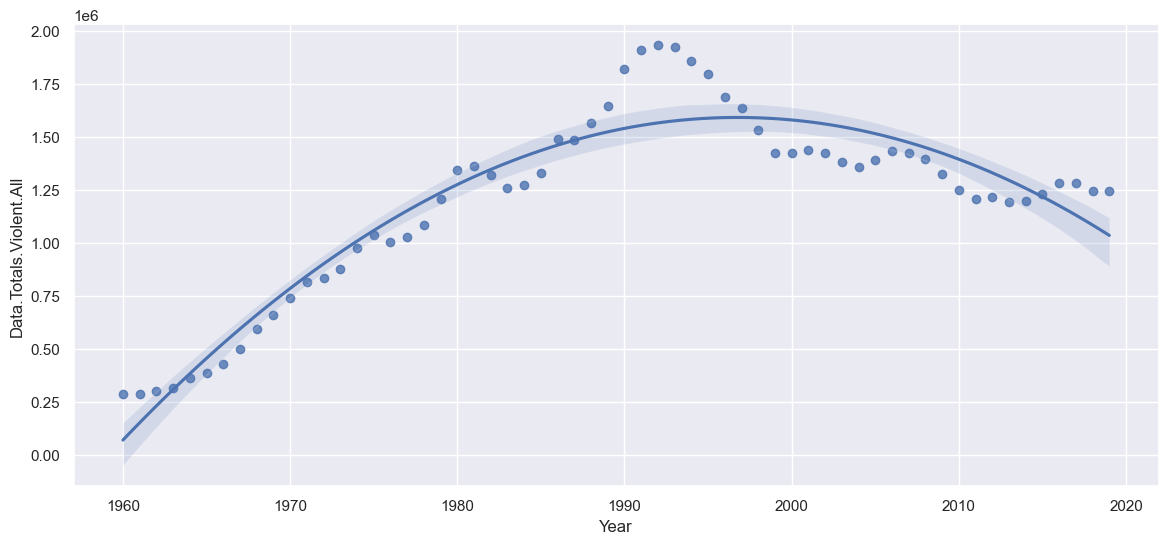

In [68]:
sns.set_style('darkgrid')  # changes the background of the plot
plt.figure(figsize=(14, 6))
# fit_reg fits a regression line
sns.regplot(x='Year', y='Data.Totals.Violent.All', data=state_crime_usa, fit_reg=True, order=2)

### lmplot

With `lmplot()`, we can also plot scatter points for each state and it would give approximate trend line

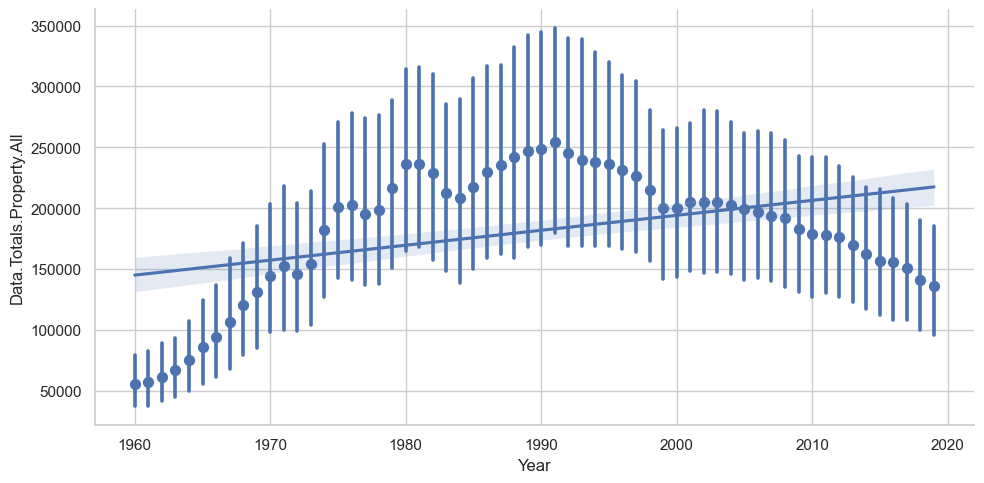

In [69]:
sns.set_style('whitegrid')
sns.lmplot(x='Year', y='Data.Totals.Property.All', data=state_crime_states, x_estimator=np.mean, aspect=2)

This plot shows a similar trend too. However, it shows mean from each state as compared to the sum of all states in the previous case.

We can make this plot for each state, seperately, in the form of grid by using `col` argument.

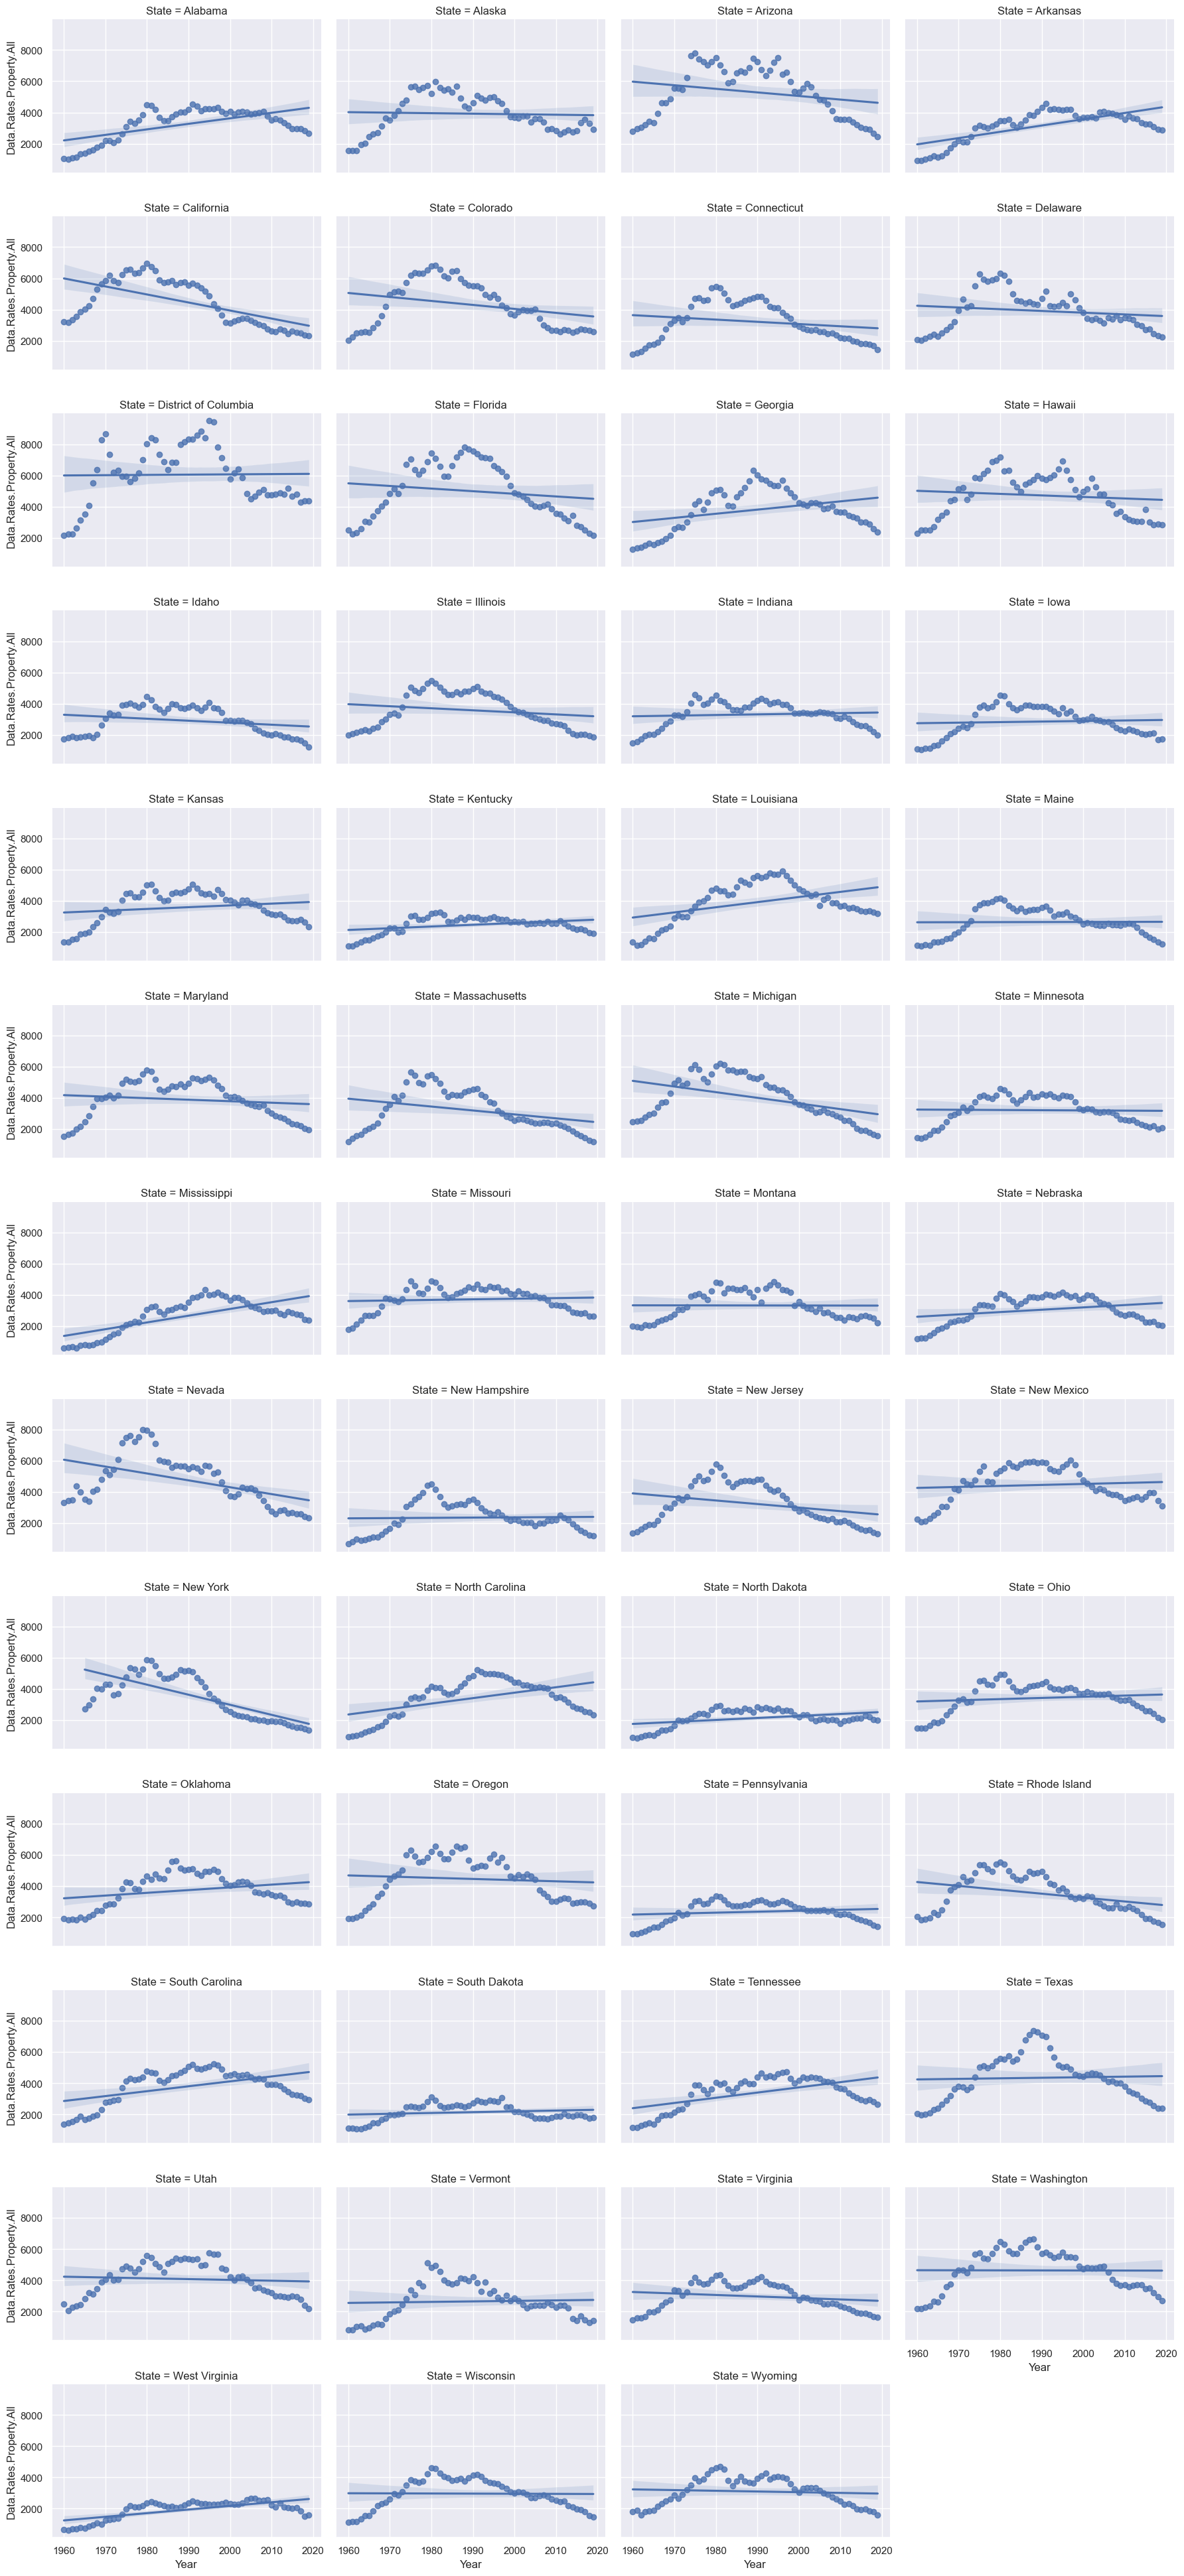

In [70]:
sns.set_style('darkgrid')
sns.lmplot(x='Year', y='Data.Rates.Property.All',
           data=state_crime_states,
           col='State',
           col_wrap=4,
           height=3,
           y_jitter=.5,
           aspect=1.5)

### pairplot
The two plots which have shared x or y axis can be made using `pairplot`.

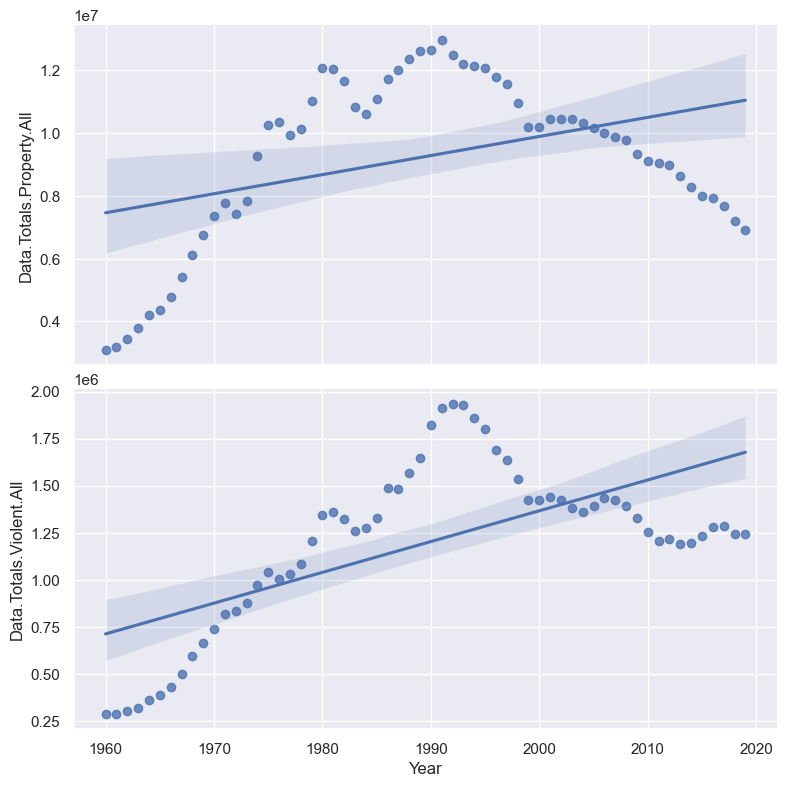

In [71]:
sns.pairplot(state_crime_usa, x_vars=['Year'], y_vars=['Data.Totals.Property.All', 'Data.Totals.Violent.All'], height=4, aspect=2, kind='reg');

Comparing only Texas, NY, Florida and California (4 famous states of USA) using 1 figure, but different colors. Let's use `hue`. 

In [72]:
state_crime_four_states = state_crime[state_crime.State.isin(['Florida', 'California', 'New York', 'Texas'])]

In [73]:
state_crime_four_states.shape

(235, 21)

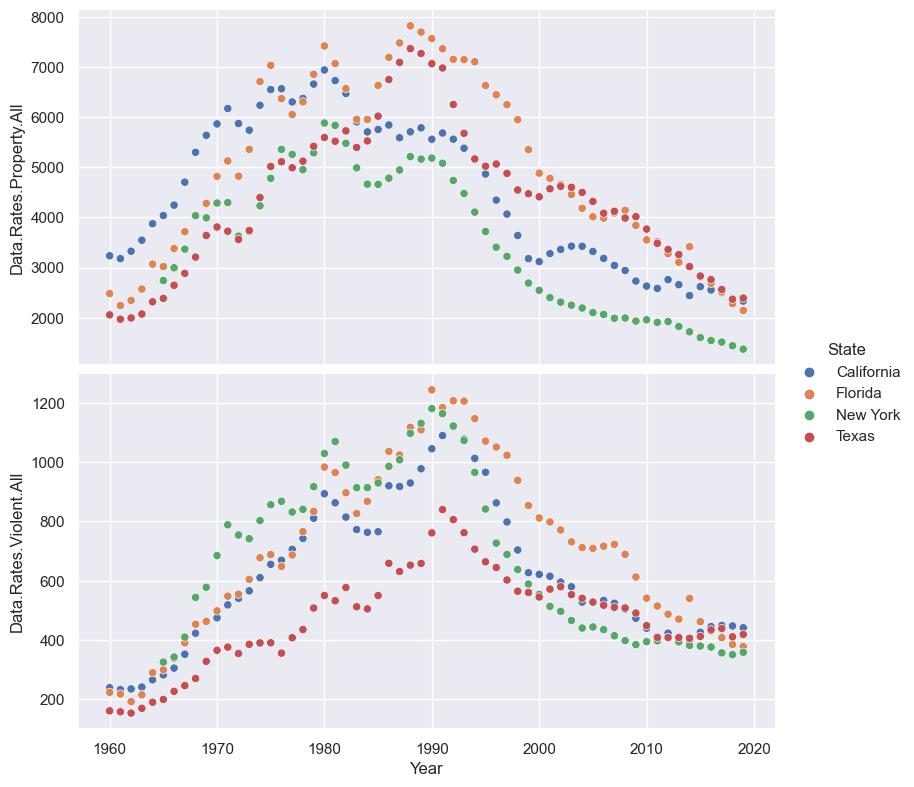

In [74]:
sns.set_style('darkgrid')
sns.pairplot(state_crime_four_states, x_vars=['Year'], y_vars=['Data.Rates.Property.All', 'Data.Rates.Violent.All'], height=4, aspect=2, kind='scatter', hue='State')

- **Rate of both crimes per 1000 population is highest in Florida for most of the times.**  
- **After year 2000, rates are lowest in NY.**

## Univariate Distributions

### distplot
Univariate distribution of observations (combines seaborn's kdeplot with matplotlib hist with good default bins)

Distribution of crime rates in USA in the recent year only for all states

In [75]:
state_crime_states.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

Plot a Gaussian kernel density line (smooth version of histogram)

Text(0.5, 1.0, 'Latest Property Crime Rate')

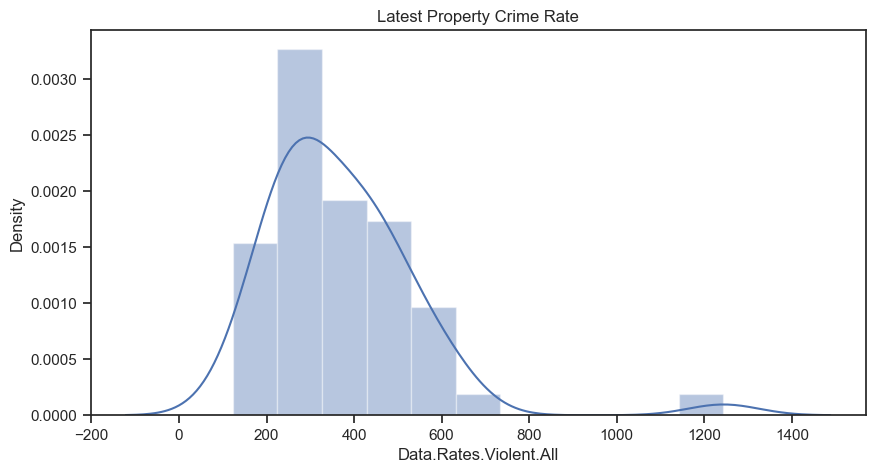

In [76]:
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Data.Rates.Violent.All'])
ax.set_title('Latest Property Crime Rate')

We can fit distribution rather than default kernel density

Text(0.5, 1.0, 'Latest Property Crime Rate')

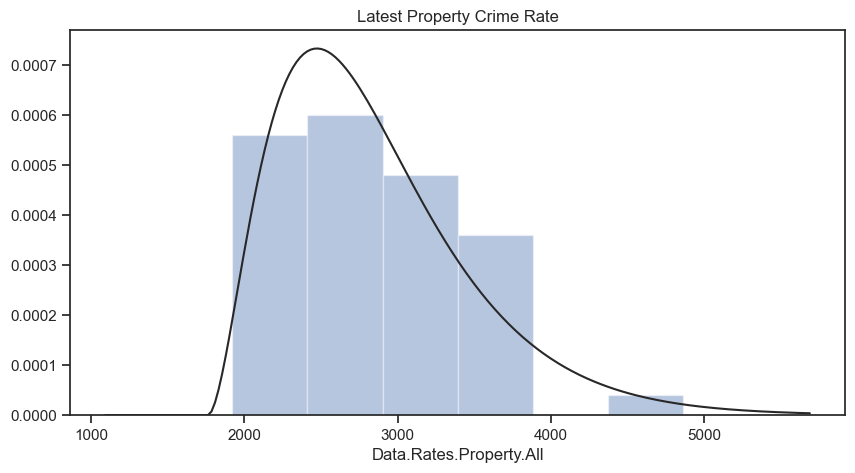

In [77]:
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Data.Rates.Property.All'],
                 kde=False, fit=stats.gamma)
ax.set_title('Latest Property Crime Rate')

`rug=True` makes ticks for each observation

Text(0.5, 1.0, 'Latest Population Distribution')

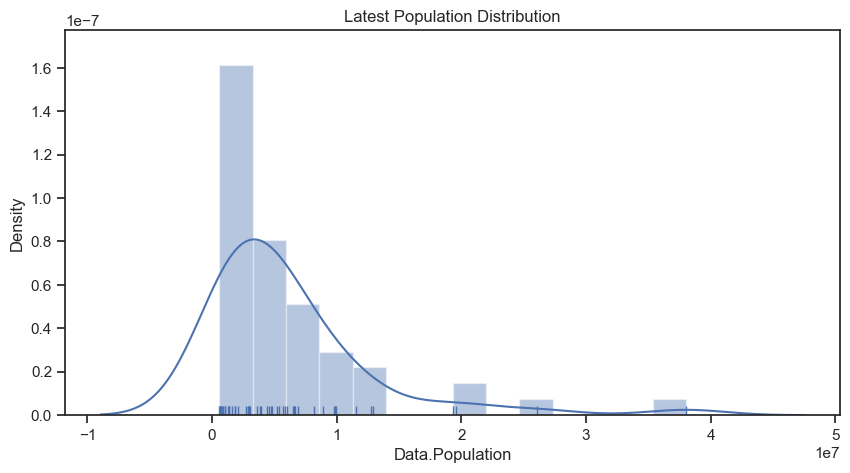

In [78]:
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Data.Population'],
                  kde=True, rug=True)
ax.set_title('Latest Population Distribution')

**A few states have very small population.**

### kdeplot
Kernel density estimate curve

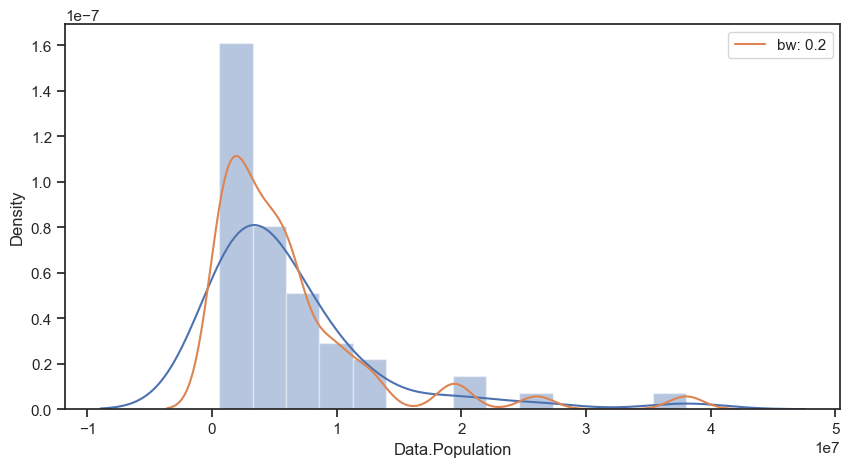

In [79]:
# shade = True, fills are area of density plot
# bw is like smoothing paramter for kernel line (basically think of bin size of histogram)
x = state_crime_states[state_crime_states.Year == 2012]['Data.Population']
plt.figure(figsize=(10, 5))
sns.distplot(x)
#sns.kdeplot(x, shade=True)
sns.kdeplot(x, bw=0.2, label="bw: 0.2")
plt.legend();

### boxplot
`boxplot()` to show distributions with respect to categories

In [80]:
state_crime_states_2012 = state_crime_states[state_crime_states.Year == 2012]

Plot boxplot to show distributions in 2012.

<Axes: ylabel='Data.Population'>

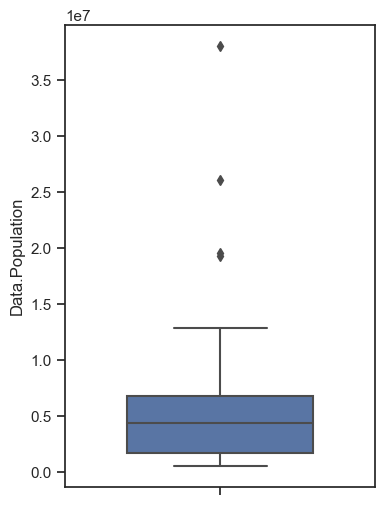

In [81]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='Data.Population', data=state_crime_states_2012, width=.6)

## Bivariate Distributions

### jointplot
`jointplot()` draws a plot of two variables with bivariate graphs.

<Figure size 1200x600 with 0 Axes>

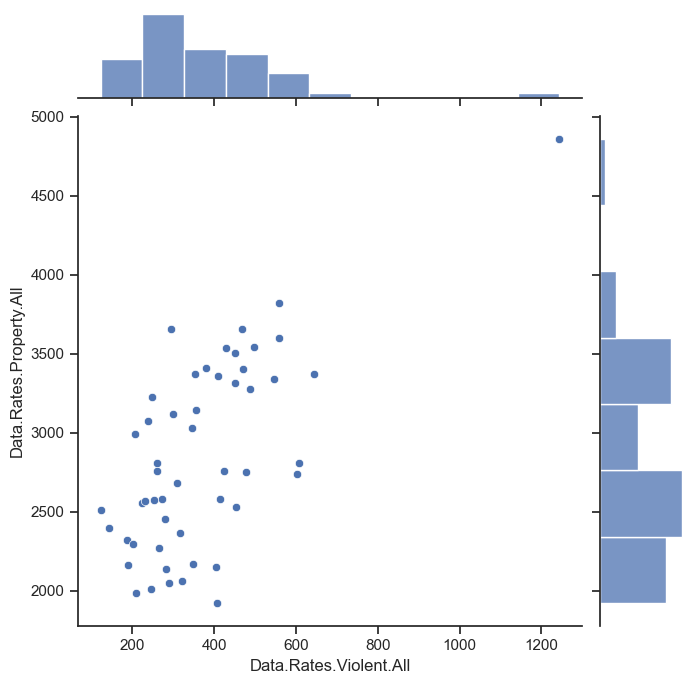

In [82]:
plt.figure(figsize=(12,6)) 
sns.jointplot(x="Data.Rates.Violent.All", y="Data.Rates.Property.All", data=state_crime_states_2012, height = 7)

- **In 2012, overall violence crime rate is generally in low range of 200-500 per 100,000 population.** 
- **But, property crime rate is varying from 2000 to 4000 for different states.**

### pairwise 
`pairwise()` bivariate distribution in a dataset

Is there relationship between different crime rates in different states of USA in 2012?

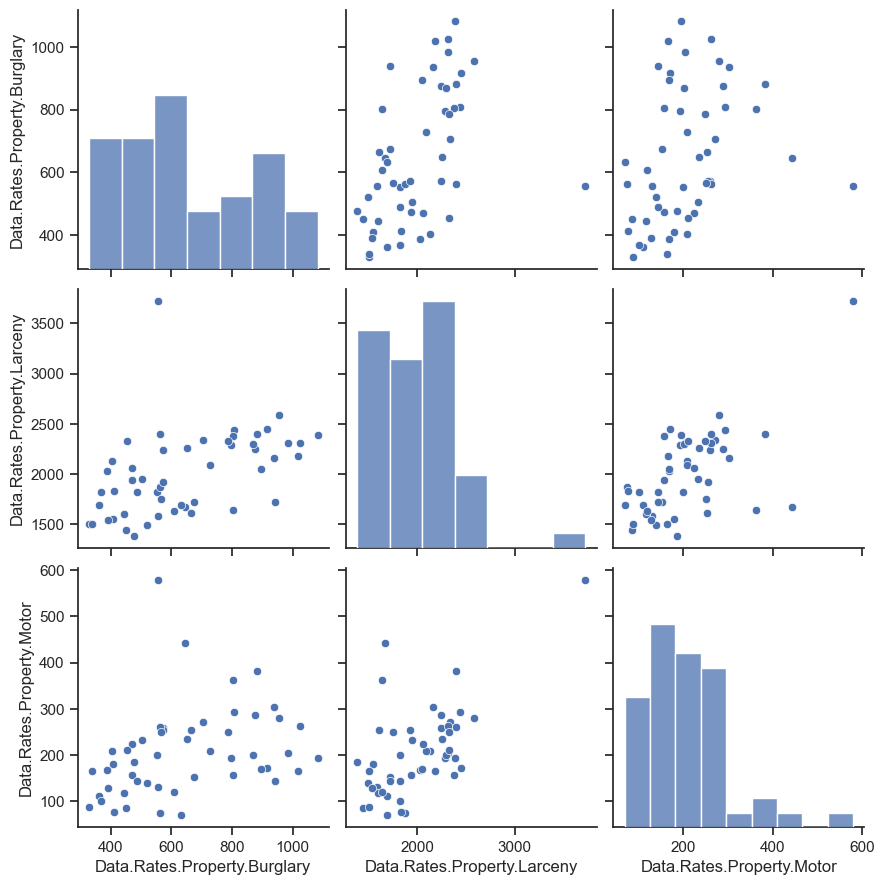

In [83]:
sns.pairplot(state_crime_states_2012[['Data.Rates.Property.Burglary',
                                      'Data.Rates.Property.Larceny',
                                      'Data.Rates.Property.Motor']], height = 3)

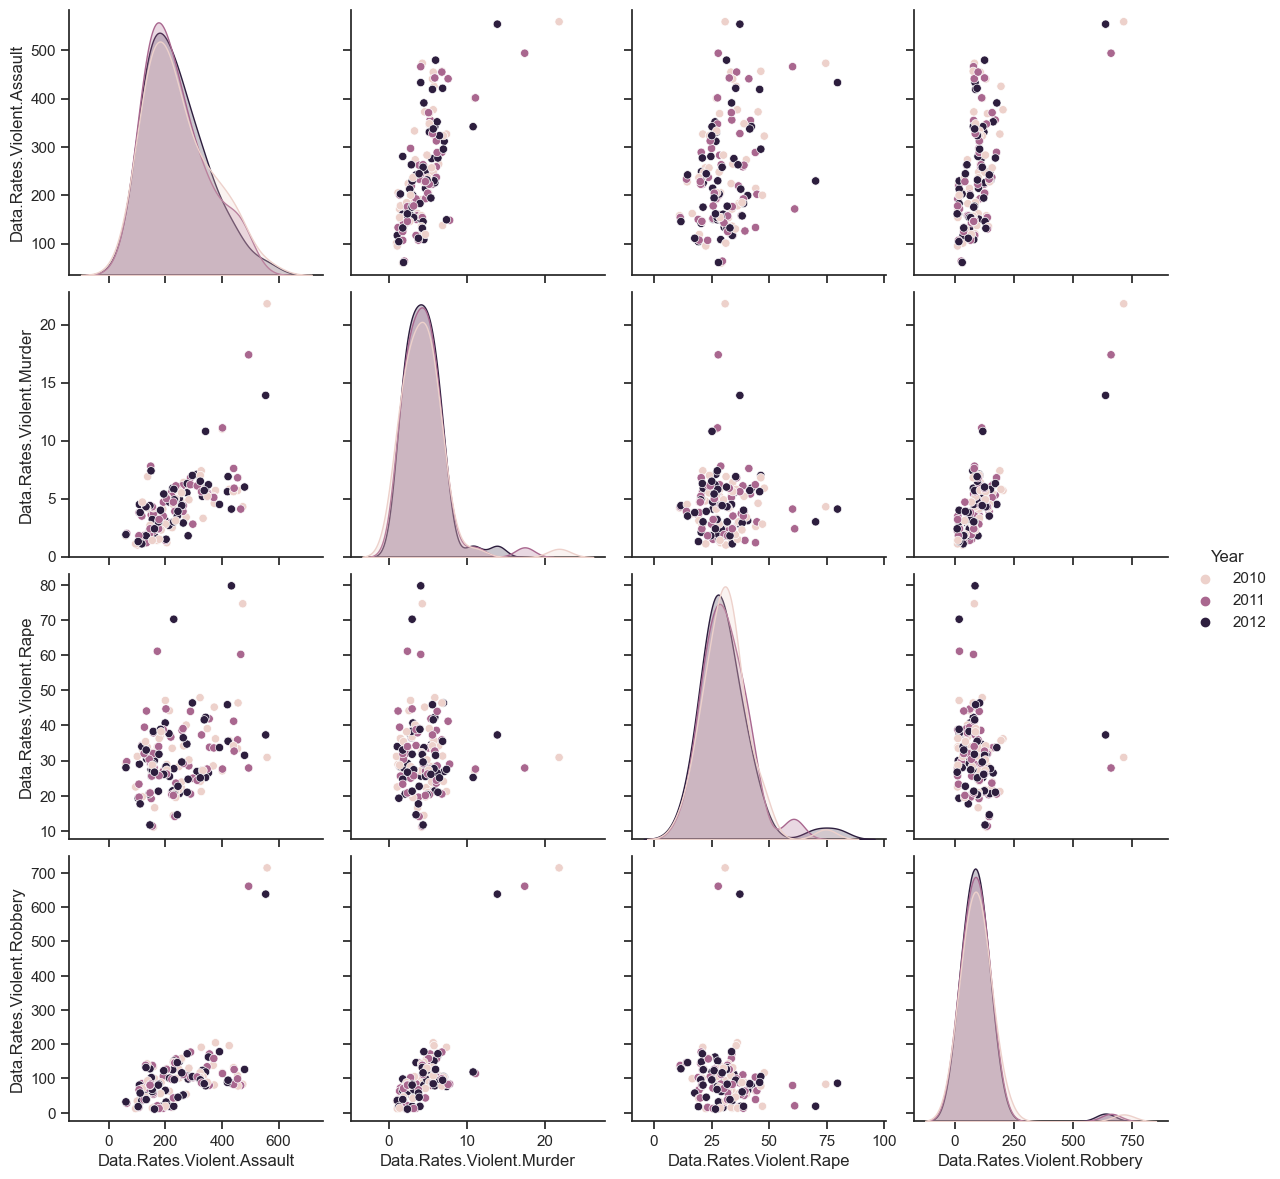

In [84]:
# we can add hue if want to add colors to categories (Year)
# we can add columns of interest in variables too
sns.set_style('ticks')
sns.pairplot(state_crime_states[state_crime_states.Year.isin([2010,2011,2012])],
             vars= ['Data.Rates.Violent.Assault',
                    'Data.Rates.Violent.Murder',
                    'Data.Rates.Violent.Rape',
                    'Data.Rates.Violent.Robbery'],
             hue='Year', height = 3, diag_kind='kde');
# plt.rcParams.update({'font.size': 12})

- **In most of the states, the cases of violent robbery as relatively less.**
- **Across states, occurence of one type of crime is also correlated with most of other crimes, especially in property related crimes.**

## Plotting with categorical data

### stripplot
- Categorical scatter plot

- Draw a categorical scatterplot using jitter to reduce overplotting.
- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

In [85]:
sns.set(style="whitegrid", color_codes=True)

<Axes: xlabel='Data.Rates.Violent.All', ylabel='State'>

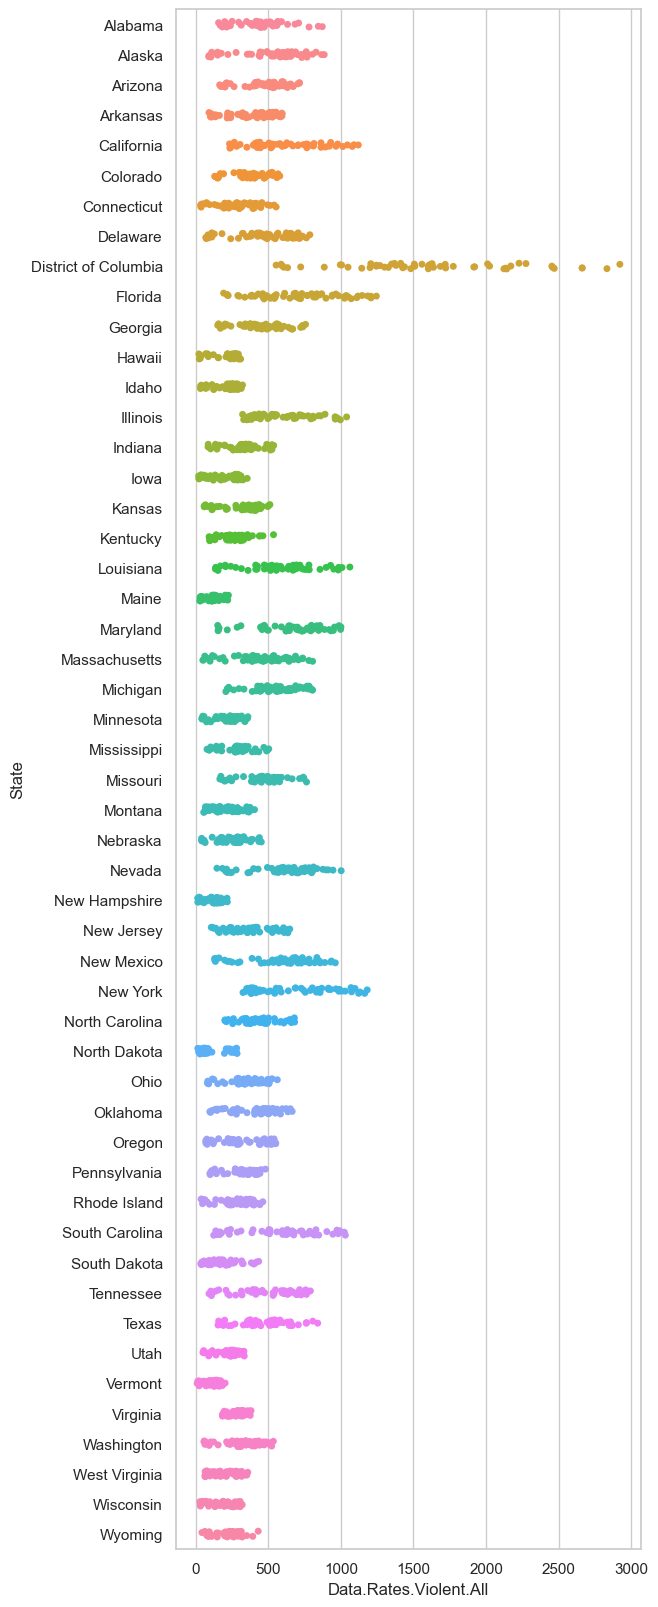

In [86]:
plt.figure(figsize=(6,20))
sns.stripplot(x="Data.Rates.Violent.All", y="State", data=state_crime_states, size=5)


### swarmplot
Similar to `stripplot`, but `swarmplot` shows all points by spreading points in horizontal direction

In [87]:
state_crime_four_states.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [88]:
f = lambda x: 'new' if x.Year > 2000 else 'old'

In [89]:
state_crime_four_states['old_new'] = state_crime_four_states.apply(f, axis=1)

In [90]:
state_crime_four_states.old_new.value_counts()

old    159
new     76
Name: old_new, dtype: int64

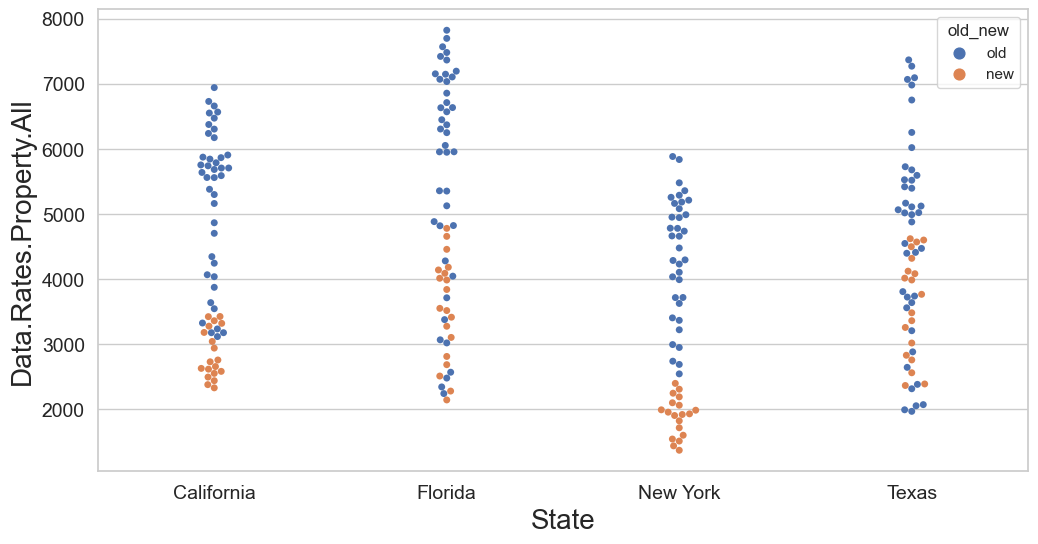

In [91]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="State", y="Data.Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new',
              size=5);
plt.xlabel('State', fontsize=20);
plt.ylabel('Data.Rates.Property.All', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=14);

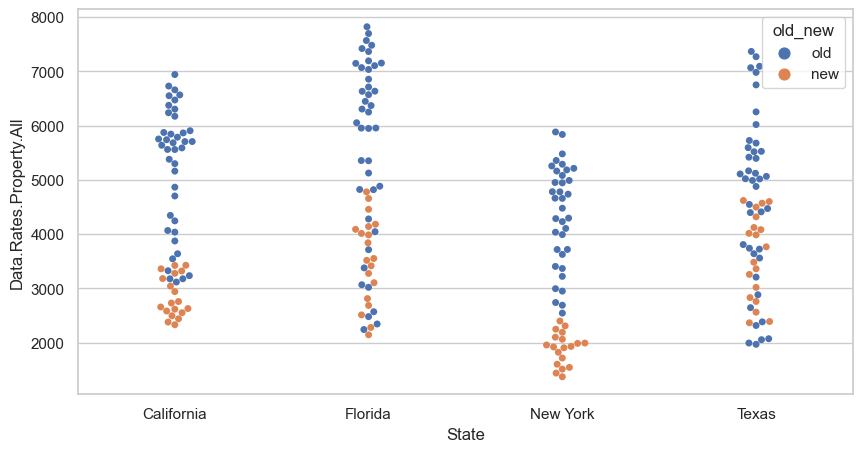

In [92]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="State", y="Data.Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new',
              size=5);

- **New York has very low property and violent crime after 2000.** 
- **Texas still has high relative property crime rate.**
- **California has also done a good job to reduce crime rate.** 

### boxplot (multi-categories)
Boxplot for quantiles (for multiple categories)

Same data as above to explore boxplot and violin plot

<Axes: xlabel='State', ylabel='Data.Rates.Property.All'>

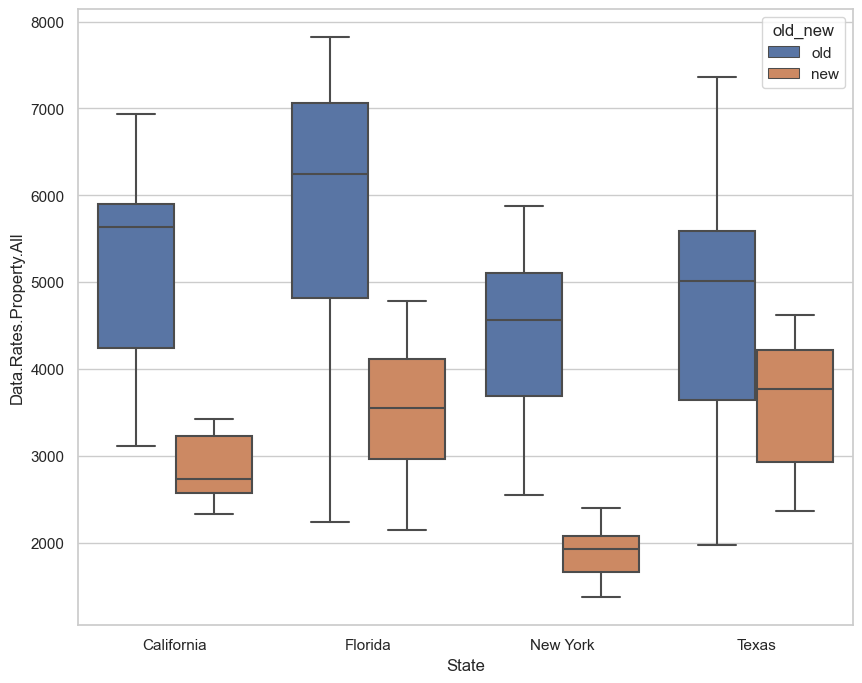

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(x="State", y="Data.Rates.Property.All",
            data=state_crime_four_states, 
            hue='old_new', dodge=True)

We can also apply dodge=False

<Axes: xlabel='State', ylabel='Data.Rates.Violent.All'>

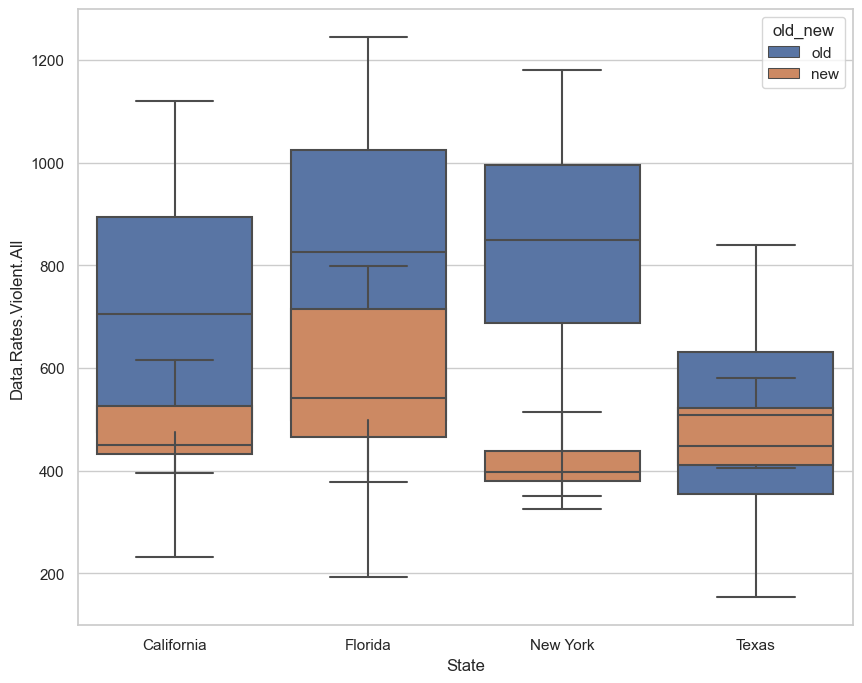

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(x="State", y="Data.Rates.Violent.All",
            data=state_crime_four_states, 
            hue='old_new', dodge=False)

### violinplot
Similar to boxplot, but also shows distribution of data

<Axes: xlabel='State', ylabel='Data.Rates.Property.All'>

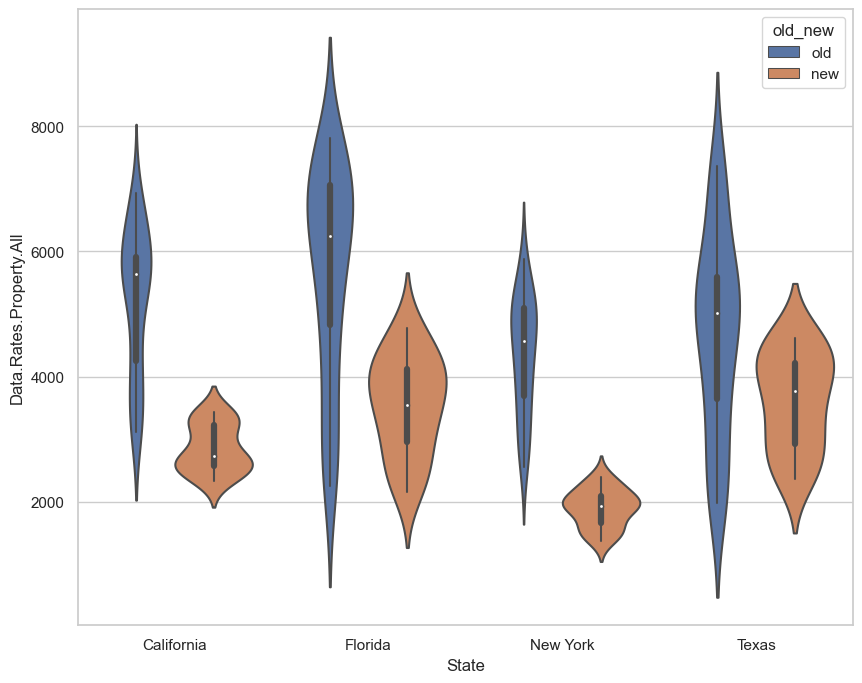

In [95]:
plt.figure(figsize=(10,8))
sns.violinplot(x="State", y="Data.Rates.Property.All",
               data=state_crime_four_states, 
               hue='old_new')

`split = True` to combine violin plots. It can be used when hue has only 2 values like our case.

`scale = Count` makes plot based on actual count in each category of hue.

<Axes: xlabel='State', ylabel='Data.Rates.Violent.All'>

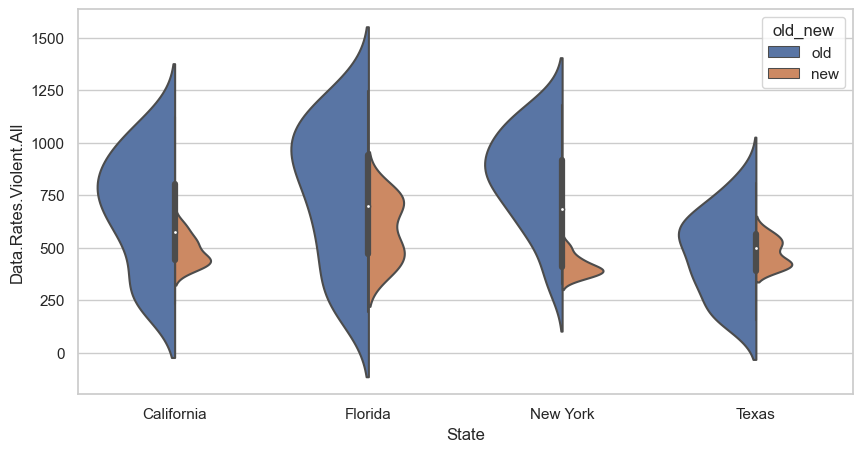

In [96]:
plt.figure(figsize=(10,5))
sns.violinplot(x="State", y="Data.Rates.Violent.All",
               data=state_crime_four_states, 
               hue='old_new', split=True, scale='count')

Let's see value counts.

In [97]:
state_crime_four_states.State.value_counts()

California    60
Florida       60
Texas         60
New York      55
Name: State, dtype: int64

Smoothening of violin plots are sensitive to number of samples. In our case, data for all states have almost same number of samples

In [98]:
pd.crosstab(state_crime_four_states.State, state_crime_four_states.old_new)

old_new,new,old
State,,
California,19,41
Florida,19,41
New York,19,36
Texas,19,41


### barplots
central tendency with confidence interval

<Axes: xlabel='Data.Rates.Violent.All', ylabel='State'>

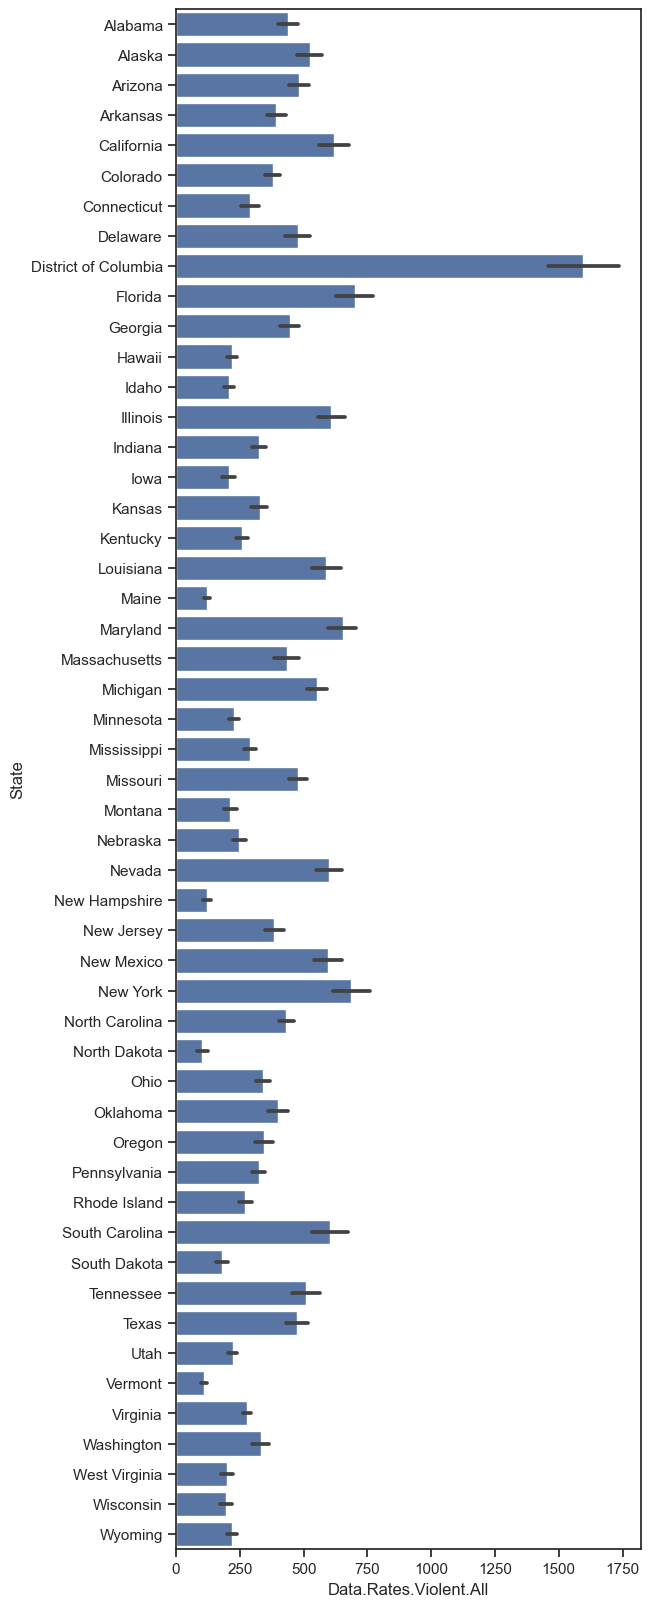

In [99]:
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Data.Rates.Violent.All', y='State', data=state_crime_states, color='b')

**States like Vermond, North Dakota have low mean violent crime rate. District of columbia has very high average crime rate.**

barplot for population 

<Axes: xlabel='Data.Population', ylabel='State'>

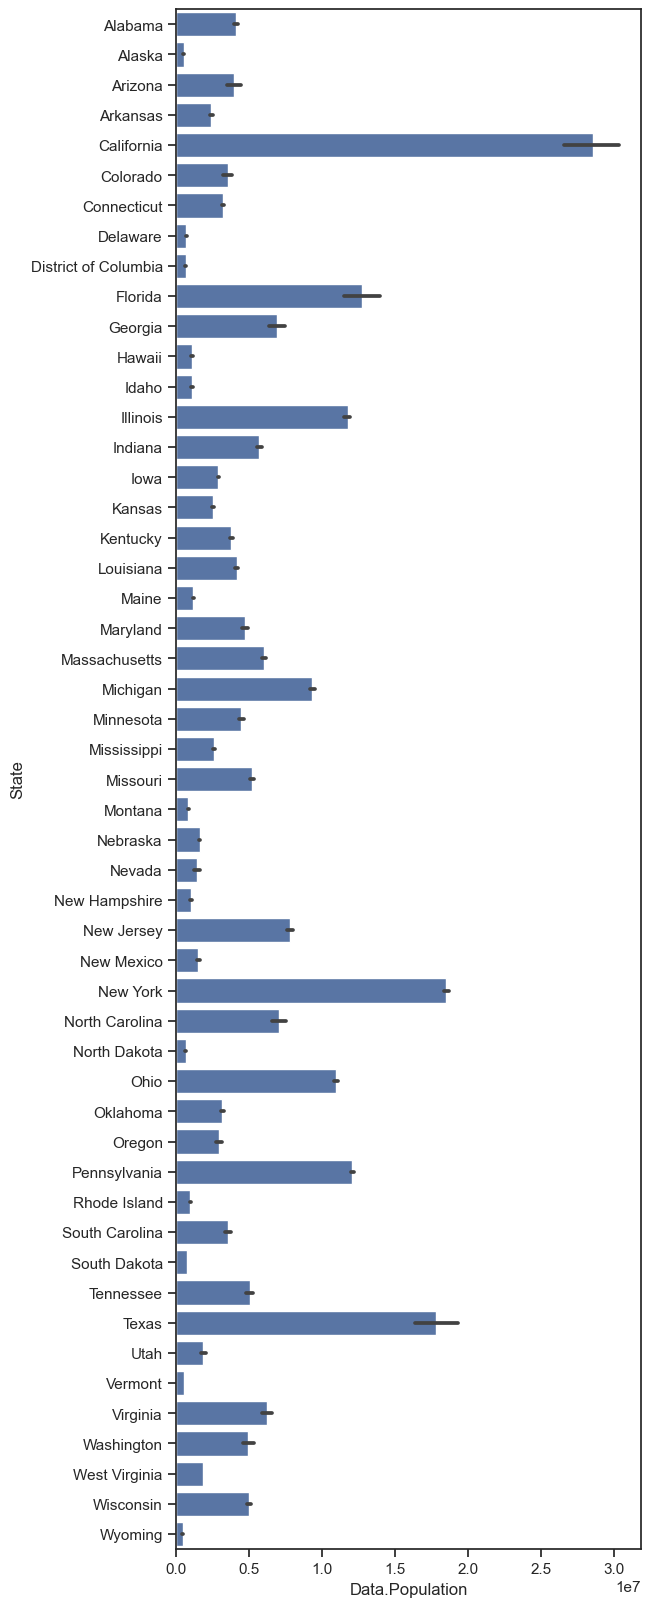

In [100]:
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Data.Population', y='State', data=state_crime_states, color='b')

The population in District of Columbia is very low. That might be contributing to its high rate of crime. California is highest populated state in US, followed by NY

In [101]:
state_crime_states['old_new'] = state_crime_states.apply(f, axis=1)

barplots with hue

<Axes: xlabel='Data.Rates.Violent.All', ylabel='State'>

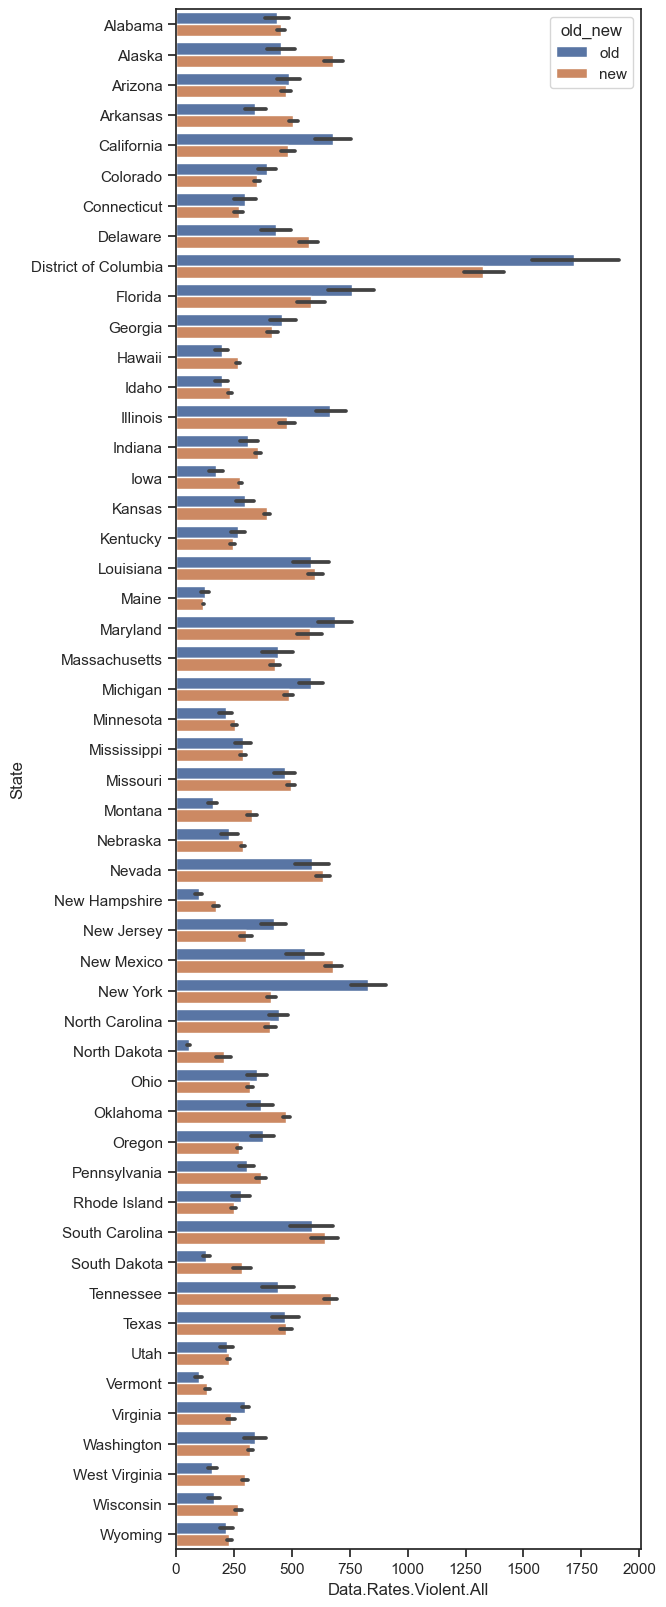

In [102]:
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Data.Rates.Violent.All',y='State',data=state_crime_states,hue='old_new')

**Violent crime rate has increased in Alaska, Tennessae, West Virginia, Wisconsin than before 2000.**

### pointplot
Same information as boxplot can also be visualized using pointplot

<Axes: xlabel='Year', ylabel='Data.Rates.Violent.All'>

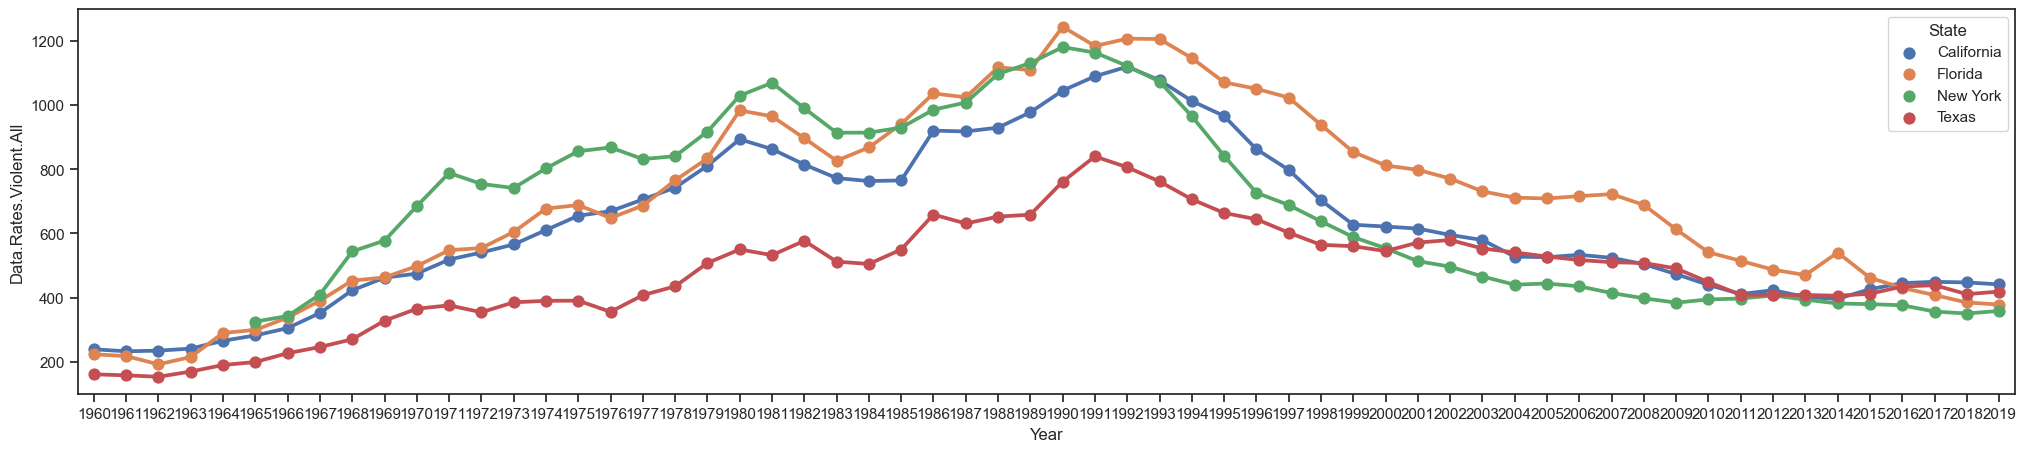

In [103]:
# pointplot with hue
sns.set_style(style='ticks')
plt.figure(figsize=(25,5))
sns.pointplot(y='Data.Rates.Violent.All', x='Year', data=state_crime_four_states, hue='State')

**Rate has followed similar pattern in these 4 states.**

### countplot
Gives count of observation in each category rather than mean as in barplot

<Axes: xlabel='State', ylabel='count'>

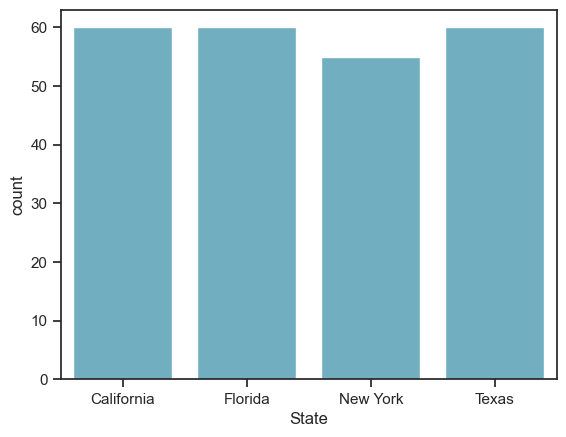

In [104]:
# pointplot with hue
sns.set_style(style='ticks')
#plt.figure(figsize=(25,5))
sns.countplot(x='State', data=state_crime_four_states, color='c')

Use of countplot here doesn't make sense here actually. This is just for exploration purpose

### facetgrid
Apply pyplot plots for sublevels of categories

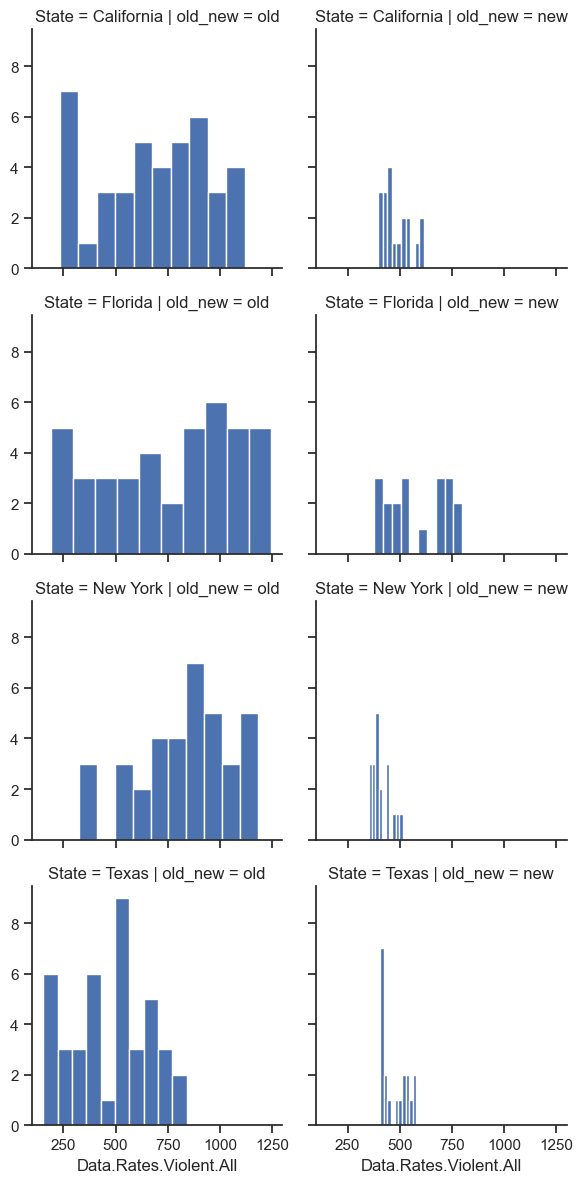

In [105]:
sns.set(style="ticks", color_codes=True)
# Multi-plot grid for plotting conditional relationships.
g = sns.FacetGrid(state_crime_four_states, col="old_new",  row="State") 
# Apply a plotting function to each facet's subset of the data.
g = g.map(plt.hist, "Data.Rates.Violent.All") 

Can apply scatter fuction on facegrid

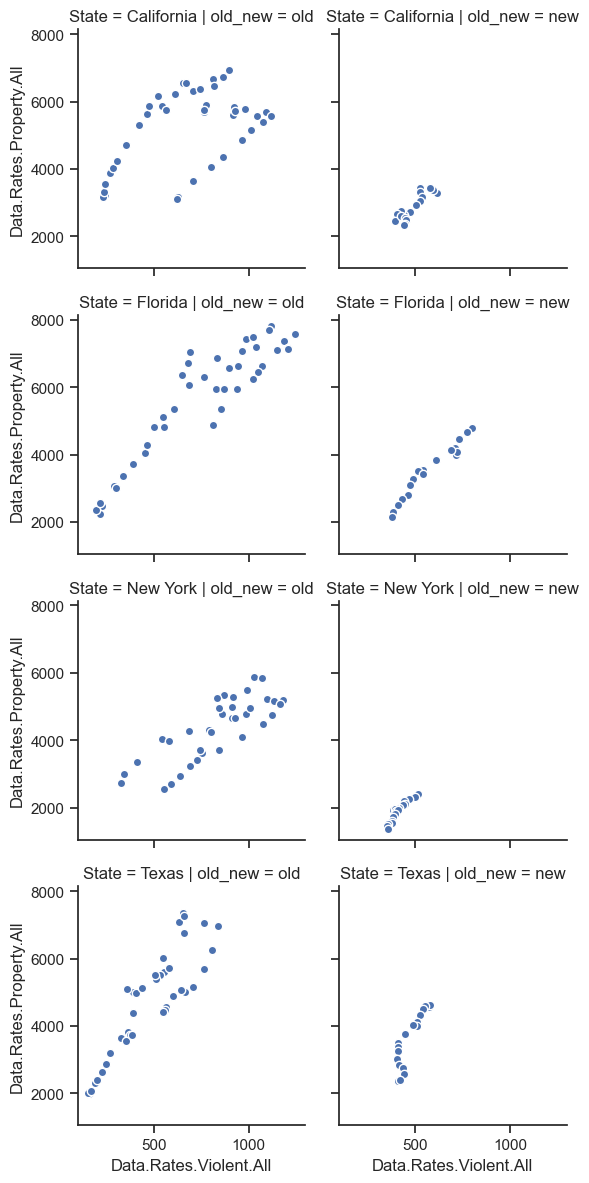

In [106]:
# x and y needed here
# Multi-plot grid for plotting conditional relationships.
g = sns.FacetGrid(state_crime_four_states, col="old_new",  row="State")
# Apply a plotting function to each facet's subset of the data.
g.map(plt.scatter, "Data.Rates.Violent.All", "Data.Rates.Property.All", edgecolor="w")